In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv("final_2015.csv")

In [6]:
df = df.drop(columns="Unnamed: 0")

In [10]:
features = df[["gdp_per_capita", "family", "life_expectancy", "freedom", "government_corruption", "generosity"]].values


In [12]:
X = features
Y = df["score"].values

In [14]:
df.head()

,score,gdp_per_capita,family,life_expectancy,freedom,government_corruption,generosity
0,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678
1,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630
2,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139
3,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699
4,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811


In [25]:
X = X - X.mean(axis=0)

In [26]:
X = X / X.std(axis=0)

In [29]:
X = np.c_[np.ones(X.shape[0]), X]

In [ ]:
def solve_ridge_regression(X, Y, lam):
  I = np.identity(X.shape[1])
  I[0, 0] = 0
  XT = X.T
  XTX = XT @ X
  XTX_INV = np.linalg.inv(XTX + lam * I)
  theta = XTX_INV @ XT @ Y
  return theta

In [55]:
lambdas = np.logspace(0, 4, 100)

In [48]:
import matplotlib.pyplot as plt

In [64]:
features_labels = ["gdp_per_capita", "family", "life_expectancy", "freedom", "government_corruption", "generosity"]

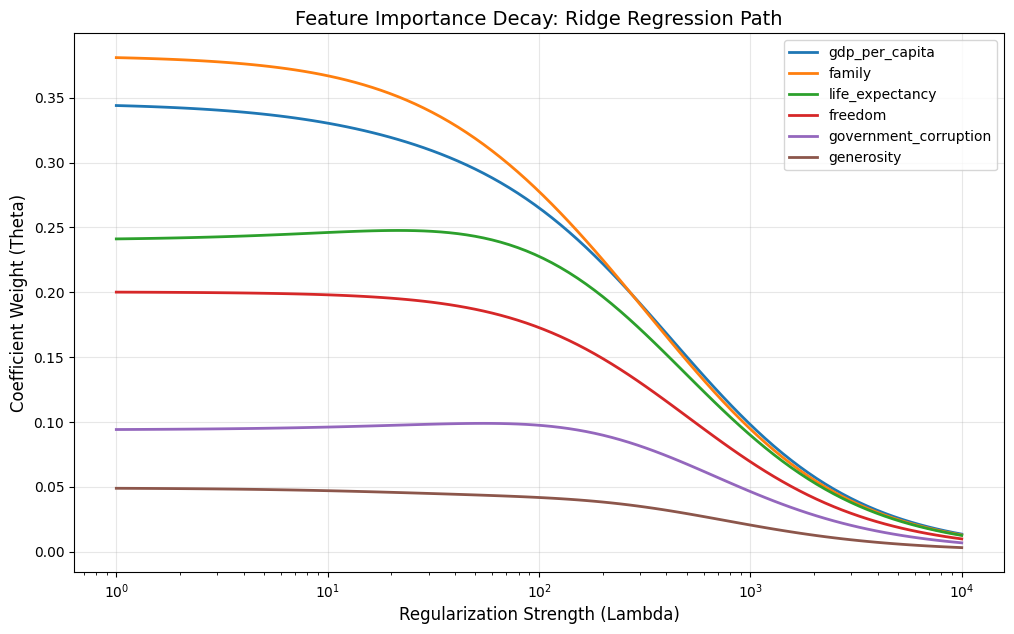

In [66]:
all_thetas = []
for l in lambdas:
  theta = solve_ridge_regression(X, Y, l)
  all_thetas.append(theta[1:])

all_thetas = np.array(all_thetas)

plt.figure(figsize=(12, 7))
for i in range(len(features_labels)):
  plt.plot(lambdas, all_thetas[:, i], label=features_labels[i], linewidth=2)

plt.xscale('log')
plt.xlabel('Regularization Strength (Lambda)', fontsize=12)
plt.ylabel('Coefficient Weight (Theta)', fontsize=12)
plt.title('Feature Importance Decay: Ridge Regression Path', fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()



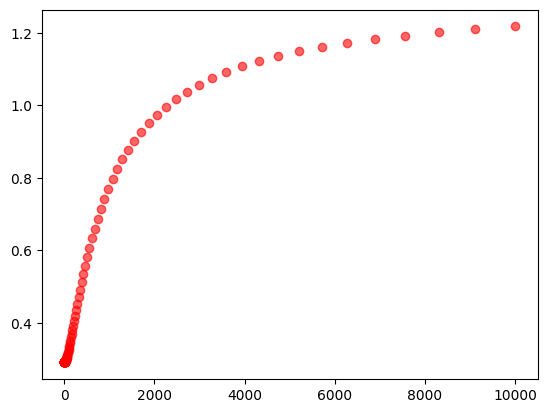

In [67]:
for l in lambdas:
  theta = solve_ridge_regression(X, Y, l)
  prediction = X @ theta
  prediction = np.array(prediction.tolist())
  error = prediction - np.array(Y.tolist())
  error = error ** 2
  mse = error.mean()

  plt.scatter(x=l, y=mse, alpha=0.6, color="red")

plt.show()
